# Perform Illumination correction on an Image

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ome/omero-guide-python/blob/master/notebooks/IlluminationCorrectionNotebook.ipynb)

The notebook takes an image as a parameter and uses [scikit-image](https://scikit-image.org/) to perform some illumination correction

### Install dependencies if required
The cell below will install dependencies if you choose to run the notebook in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true).

In [ ]:
# Ice Python binding
%pip install https://github.com/glencoesoftware/zeroc-ice-py-linux-x86_64/releases/download/20240202/zeroc_ice-3.6.5-cp310-cp310-manylinux_2_28_x86_64.whl
# Package required to interact with IDR or OMERO
%pip install omero-py==5.19.2

### Import Packages

In [1]:
from IPython import get_ipython
from omero.gateway import BlitzGateway
import matplotlib.pyplot as plt
from skimage.morphology import disk, white_tophat
from getpass import getpass

### OMERO Credentials

In [2]:
HOST = 'wss://workshop.openmicroscopy.org/omero-ws'
conn = BlitzGateway(input("Username: "),
                    getpass("OMERO Password: "),
                    host=HOST, secure=True)
conn.connect()

Username:  trainer-1
OMERO Password:  ········


True

### OMERO Image ID

In [3]:
# To be modified
# ex: Select an Image from the dataset named 'PTRE' and enter its Id
image_id = 11270

### Print Image Name

In [4]:
image = conn.getObject("Image", image_id)
print(image.getName(), image.getDescription())

INMAC384-DAPI-CM-eGFP_59223_1.xdce [Well A-2, Field #1] 


### Split channel view for an individual plane

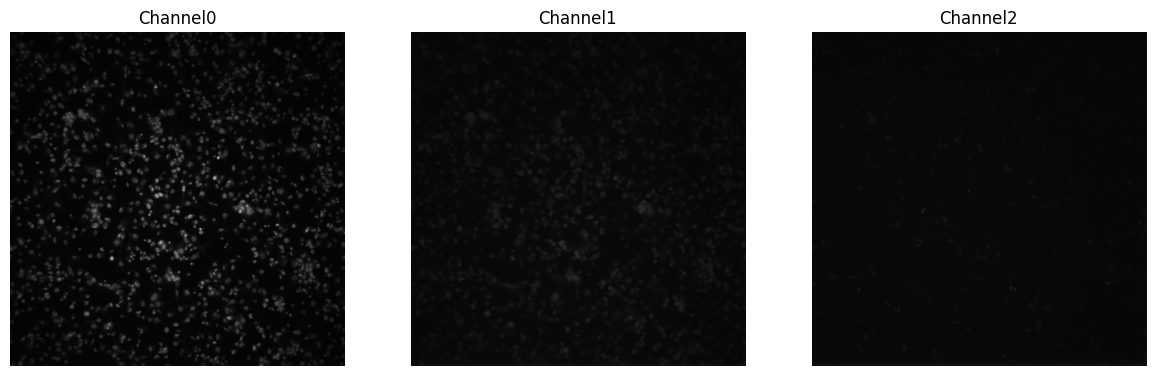

In [5]:
get_ipython().run_line_magic('matplotlib', 'inline')
pixels = image.getPrimaryPixels()
channels = image.getChannels()
plt.figure(figsize=(25, 20))
size_c = image.getSizeC()
for idx in range(0, size_c):
    plt.subplot(1, 5, idx+1)
    image_plane = pixels.getPlane(0, idx, 0)
    plt.imshow(image_plane, cmap='gray')
    plt.axis('off')
    plt.title('Channel' + str(idx))

### Tophat Filter and display the images

Text(0.5, 1.0, 'Top-Hat Filtered Image')

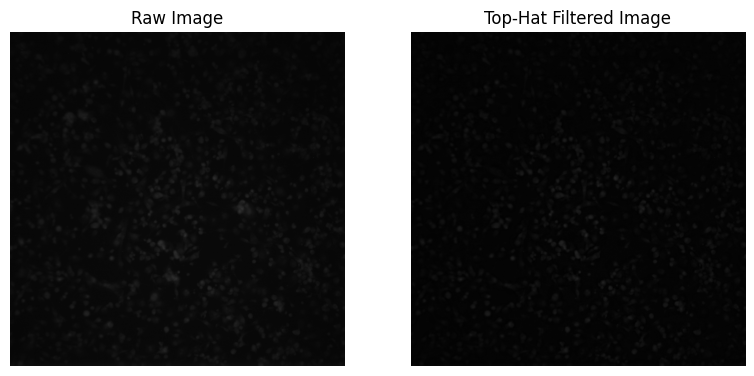

In [6]:
get_ipython().run_line_magic('matplotlib', 'inline')

image_plane = pixels.getPlane(0, 1, 0)

selem = disk(25)
w_tophat = white_tophat(image_plane, selem)

plt.figure(figsize=(25, 20))

plt.subplot(1, 5, 1)
plt.imshow(image_plane, cmap='gray')
plt.axis('off')
plt.title('Raw Image')

plt.subplot(1, 5, 2)
plt.imshow(w_tophat, cmap='gray')
plt.axis('off')
plt.title('Top-Hat Filtered Image')

### Close the connection to the OMERO server

In [7]:
conn.close()

### License (BSD 2-Clause)
Copyright (C) 2019-2024 University of Dundee. All Rights Reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.